# Data exploration

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
#Organizo el archivo .json para descargar todo
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#Se descarga el nuevo set de datos
!kaggle datasets download -d georgesaavedra/covid19-dataset

covid19-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Se descomprime
!unzip /content/covid19-dataset.zip

Archive:  /content/covid19-dataset.zip
replace owid-covid-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
d = pd.read_csv("owid-covid-data.csv")
d.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Data size

In [ ]:
print (d.shape)

(166326, 67)


Missing values in columns

In [ ]:
k = d.isna().sum()
k[k!=0]

continent                                    9956
total_cases                                  3033
new_cases                                    3193
new_cases_smoothed                           5176
total_deaths                                20875
                                            ...  
human_development_index                     30073
excess_mortality_cumulative_absolute       160630
excess_mortality_cumulative                160630
excess_mortality                           160630
excess_mortality_cumulative_per_million    160630
Length: 64, dtype: int64

Valores de la variable objetivo

<ipython-input-9-c785a6f68d25>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['new_cases']);


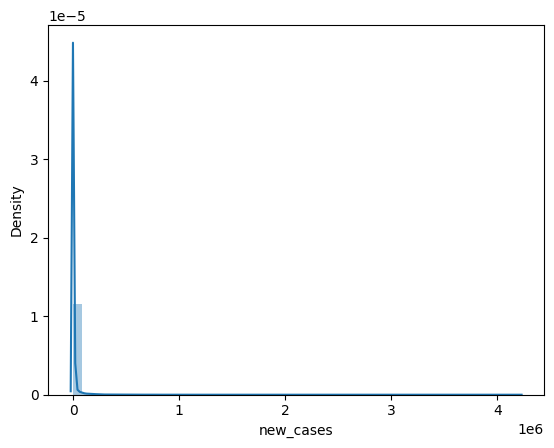

In [ ]:
sns.distplot(d['new_cases']);

<ipython-input-10-a62c848e24ba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['new_cases_per_million']);


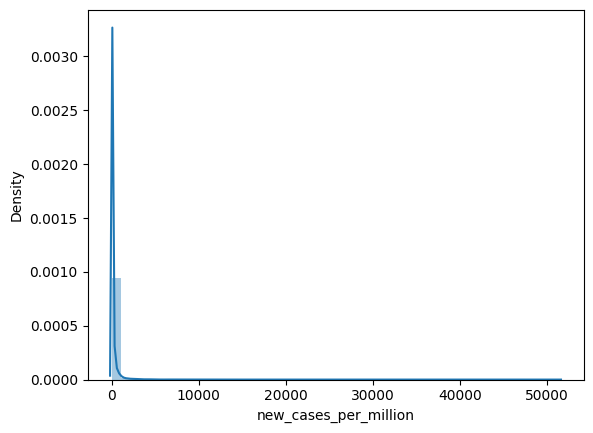

In [ ]:
sns.distplot(d['new_cases_per_million']);

# Discover data types

In [ ]:
d.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
for c in d.columns:
    print ("%20s"%c, d[c].dtype)

            iso_code object
           continent object
            location object
                date object
         total_cases float64
           new_cases float64
  new_cases_smoothed float64
        total_deaths float64
          new_deaths float64
 new_deaths_smoothed float64
total_cases_per_million float64
new_cases_per_million float64
new_cases_smoothed_per_million float64
total_deaths_per_million float64
new_deaths_per_million float64
new_deaths_smoothed_per_million float64
   reproduction_rate float64
        icu_patients float64
icu_patients_per_million float64
       hosp_patients float64
hosp_patients_per_million float64
weekly_icu_admissions float64
weekly_icu_admissions_per_million float64
weekly_hosp_admissions float64
weekly_hosp_admissions_per_million float64
           new_tests float64
         total_tests float64
total_tests_per_thousand float64
new_tests_per_thousand float64
  new_tests_smoothed float64
new_tests_smoothed_per_thousand float64
       positive_ra

# Inspect numeric columns

In [ ]:
d._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,163293.0,2.536044e+06,1.543441e+07,1.000000,2001.000000,26117.000000,298702.000000,4.451295e+08
new_cases,163133.0,1.157084e+04,8.442598e+04,0.000000,1.000000,79.000000,1063.000000,4.206334e+06
new_cases_smoothed,161150.0,1.156560e+04,8.257830e+04,0.000000,7.000000,107.143000,1146.000000,3.444237e+06
total_deaths,145451.0,5.766407e+04,3.021145e+05,1.000000,79.000000,783.000000,7307.000000,5.995245e+06
new_deaths,145487.0,1.711373e+02,8.322513e+02,0.000000,0.000000,2.000000,20.000000,1.802000e+04
...,...,...,...,...,...,...,...,...
human_development_index,136253.0,7.255868e-01,1.499642e-01,0.394000,0.602000,0.743000,0.845000,9.570000e-01
excess_mortality_cumulative_absolute,5696.0,3.761302e+04,1.043065e+05,-37726.100000,-75.150000,3424.600000,24784.625000,1.080748e+06
excess_mortality_cumulative,5696.0,9.404336e+00,1.643917e+01,-28.450000,-0.722500,6.065000,14.520000,1.110100e+02
excess_mortality,5696.0,1.596708e+01,3.009283e+01,-95.920000,-0.752500,7.195000,22.997500,3.749300e+02


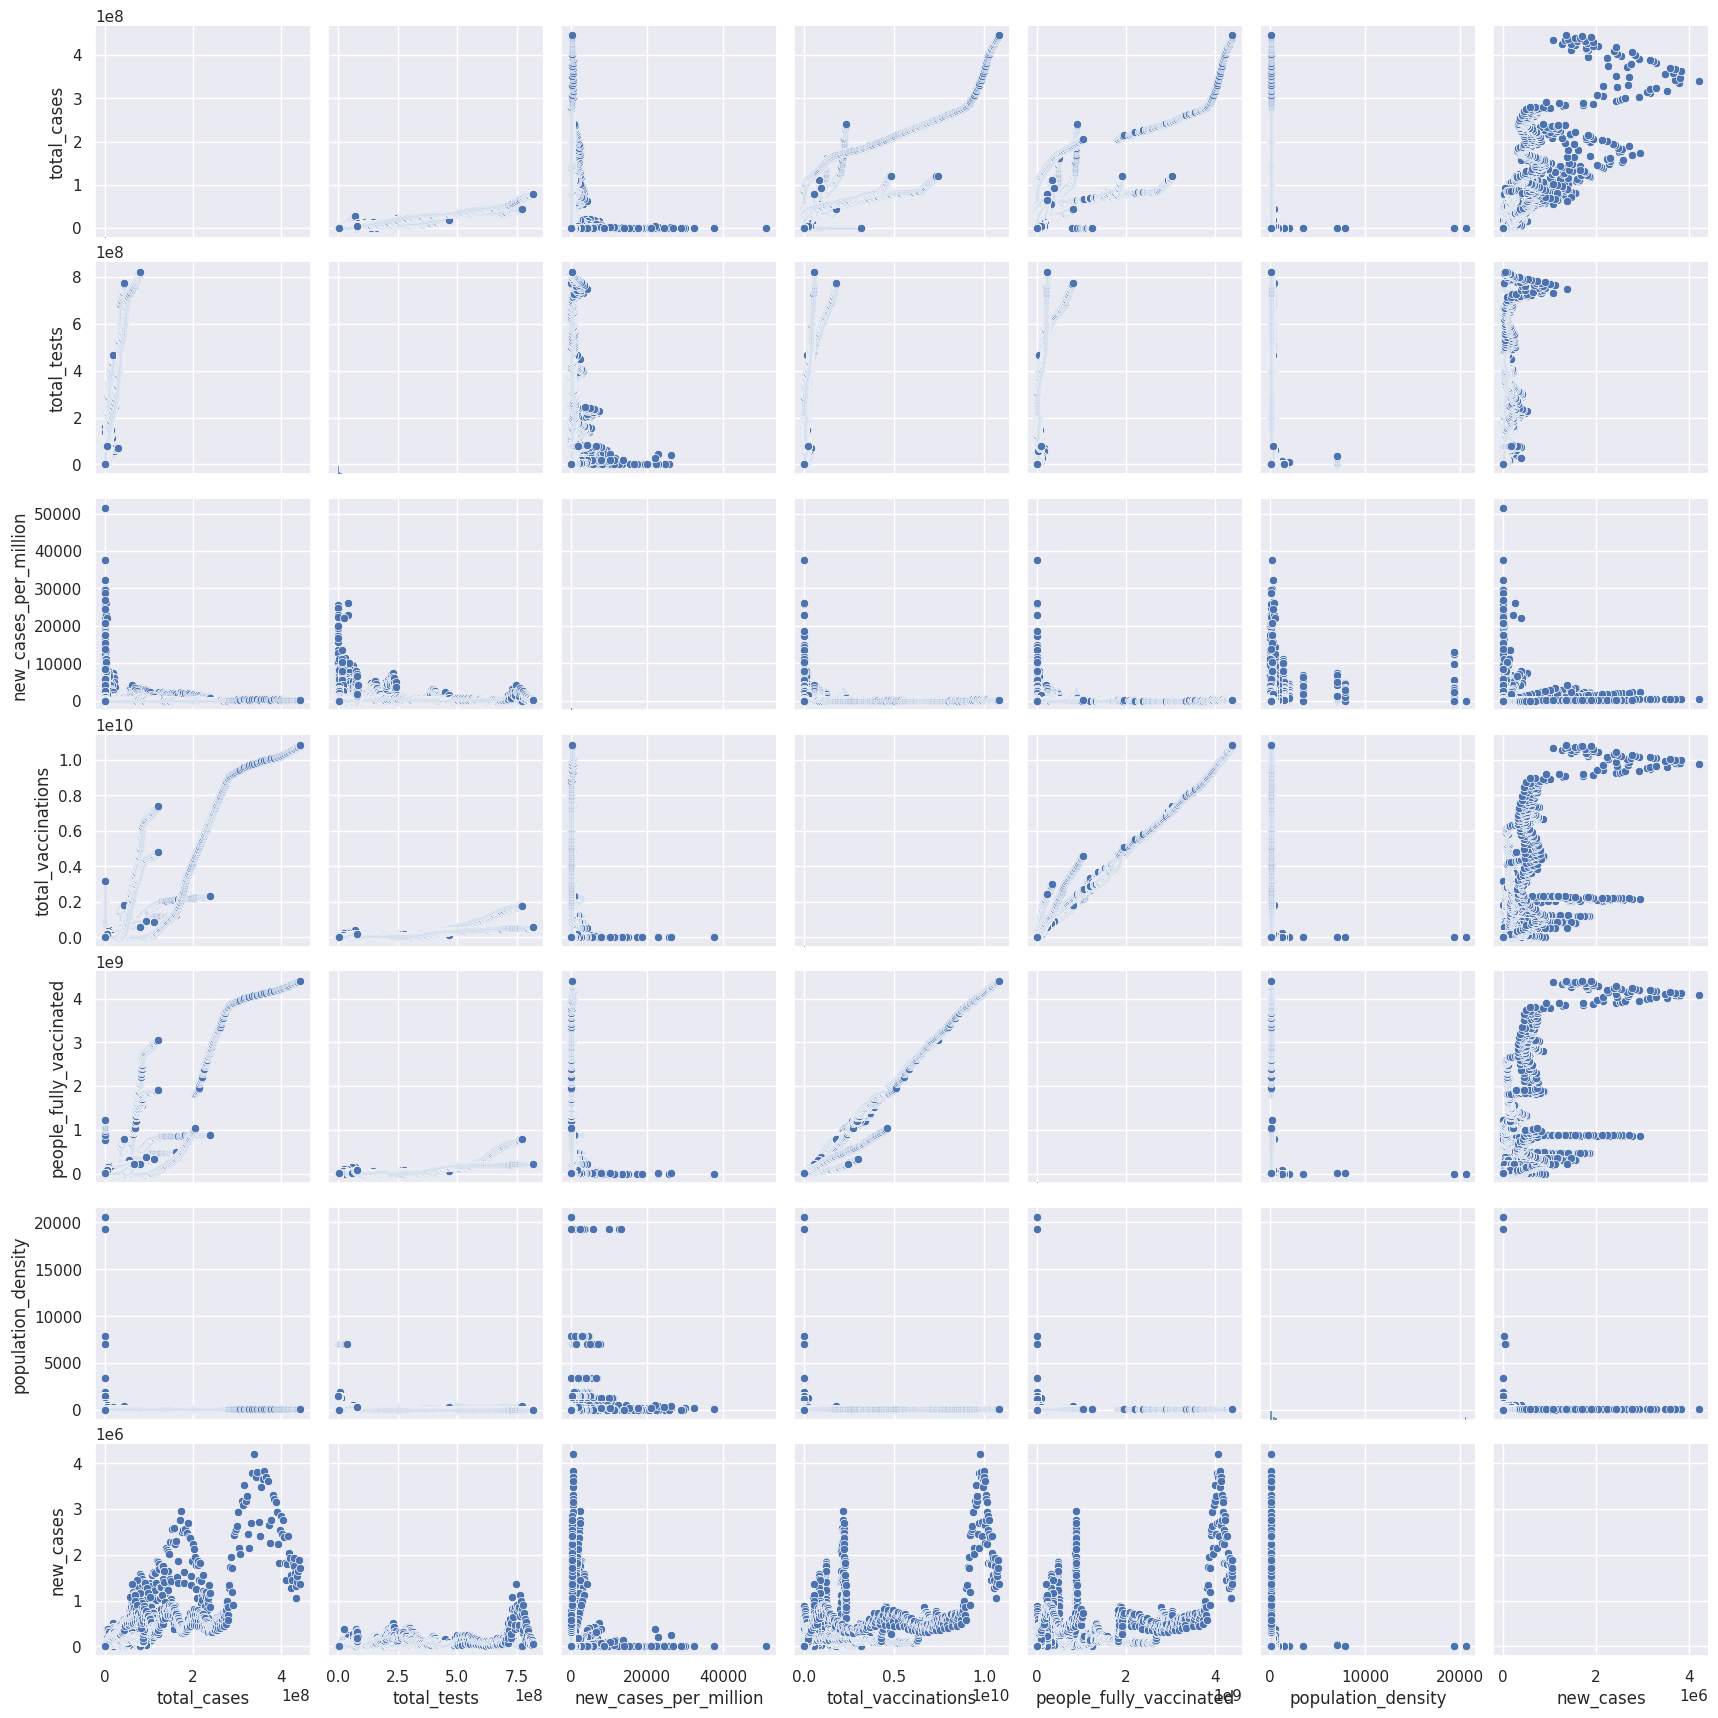

In [ ]:
cols = ['total_cases', 'total_tests', 'new_cases_per_million', 'total_vaccinations', 'people_fully_vaccinated', 'population_density', 'new_cases']
#cols = np.unique(list(np.random.permutation(d._get_numeric_data().columns)[:5])+['SalePrice'])
sns.set()
sns.pairplot(d[cols])

Correlations

<ipython-input-23-0710436d47fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = d.corr()


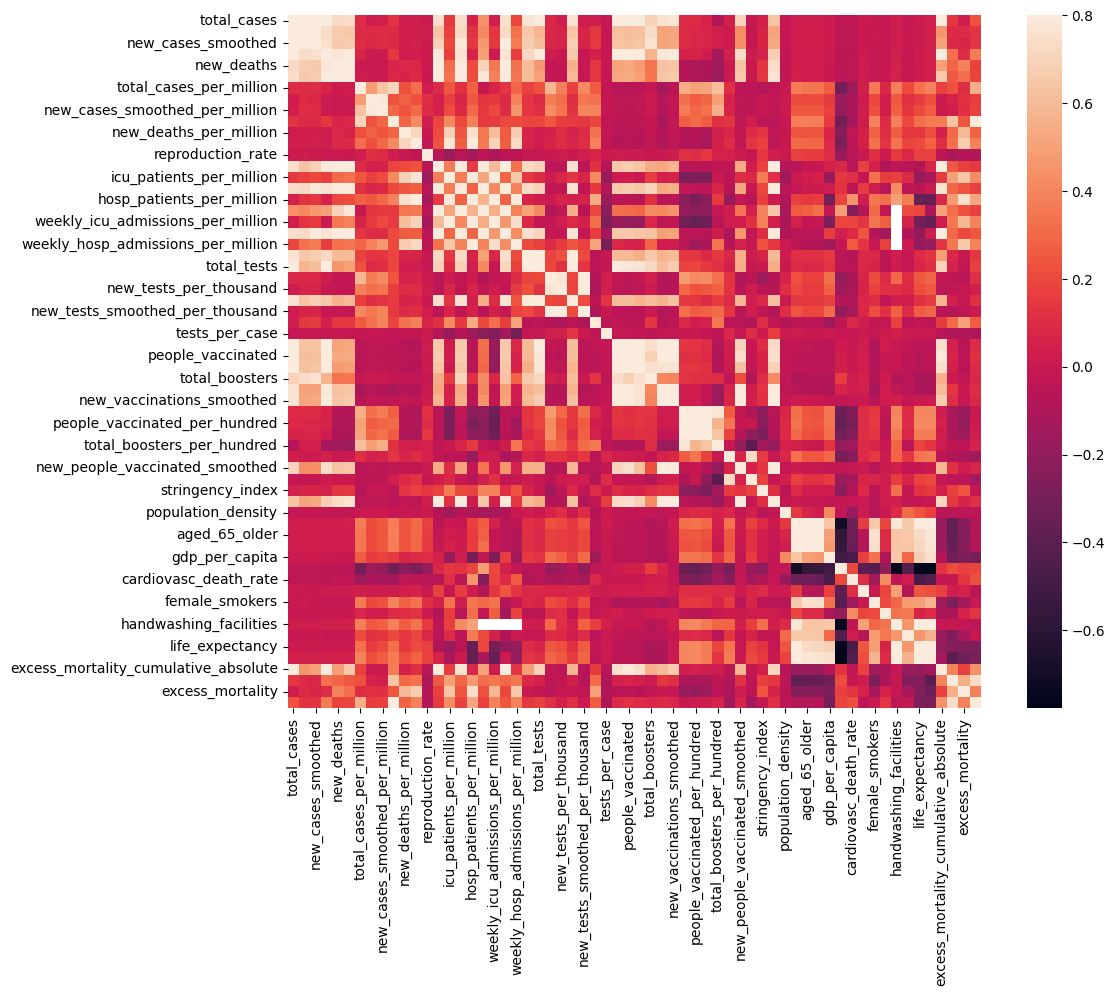

In [ ]:
#correlation matrix
corrmat = d.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Inspect categorical variables

In [ ]:
ccols = [i for i in d.columns if not i in d._get_numeric_data()]
print (ccols)

['iso_code', 'continent', 'location', 'date', 'tests_units']


In [ ]:
for c in ccols:
    print ("%10s"%c, np.unique(d[c].dropna()))

  iso_code ['ABW' 'AFG' 'AGO' 'AIA' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BES' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR'
 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COK' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW'
 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI'
 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FLK' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO'
 'GGY' 'GHA' 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUY'
 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL'
 'ISR' 'ITA' 'JAM' 'JEY' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA'
 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX'
 'LVA' 'MAC' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT'
 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MSR' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL' 'NER'
 'NGA' 'NIC' 'NIU' 'NLD' 'NOR' 'NPL' 'NRU' 'NZL' 'OMN' 'OWID_AFR'
 'OWID_ASI' 'OWID_CYN' 'OWID_EUN' 'OWID_EUR' 'O

In [ ]:
c="continent"
d[c].value_counts()

Africa           39417
Europe           37088
Asia             36200
North America    24931
South America     9517
Oceania           9217
Name: continent, dtype: int64

In [ ]:
c="location"
d[c].value_counts()

Argentina       795
Mexico          795
Thailand        792
Taiwan          780
China           774
               ... 
Turkmenistan    183
Tuvalu          179
Niue            157
Tokelau         114
Pitcairn         85
Name: location, Length: 238, dtype: int64

## Vision on missing values

Missing values in columns

In [ ]:
k = d.isna().sum()
k[k!=0]

continent                                    9956
total_cases                                  3033
new_cases                                    3193
new_cases_smoothed                           5176
total_deaths                                20875
                                            ...  
human_development_index                     30073
excess_mortality_cumulative_absolute       160630
excess_mortality_cumulative                160630
excess_mortality                           160630
excess_mortality_cumulative_per_million    160630
Length: 64, dtype: int64

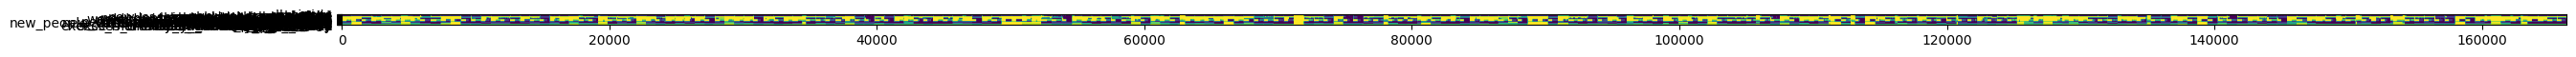

In [ ]:
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(d.isna().values.T)
ax.set_aspect(12)
plt.yticks(range(d.shape[1]), d.columns);

## UNDER CONSTRUCTION

Este proyecto sigue en proceso

# Data cleaning

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
#from local.lib import mlutils
%matplotlib inline
d['Id'] = range(len(d))
d.set_index('Id', inplace=True)
d.head()

In [ ]:
print (d.shape)

(166326, 67)


## We must repair the missing data in the following columns

**Possible repair actions**:

- Remove row or column
- Replace value (why what?)

In [ ]:
k = d.isna().sum()
k[k!=0]

continent                                    9956
total_cases                                  3033
new_cases                                    3193
new_cases_smoothed                           5176
total_deaths                                20875
                                            ...  
human_development_index                     30073
excess_mortality_cumulative_absolute       160630
excess_mortality_cumulative                160630
excess_mortality                           160630
excess_mortality_cumulative_per_million    160630
Length: 64, dtype: int64

### Inspect and understand missing data

In [ ]:
def plot_missing(col, target):

    def f1():
        if d[col].dtype==object:
            k = d[col].fillna("missing").value_counts()
            sns.barplot(x=k.index, y=k.values)
        else:
            sns.distplot(d[col].dropna())
        plt.title("distribution of %s"%col)
        plt.grid()

    def f2():
        if d[col].dtype==object:
            k=d[[col,target]].dropna()
            for v in d[col].dropna().unique():
                if sum(k[col]==v)>1:
                    sns.distplot(k[target][k[col]==v],
                                 hist_kws=dict(alpha=.3),
                                 kde_kws=dict(linewidth=1, alpha=.8),
                                 label=v);
            if sum(d[col].isna())>1:
                sns.distplot(d[target][d[col].isna()],
                             hist_kws=dict(alpha=.8),
                             kde_kws=dict(linewidth=1, alpha=1),
                             label="missing")
            plt.legend();
        else:
            plt.scatter(d[col], d[target], alpha=.5)
            plt.xlabel(target)
            plt.ylabel(col)
        plt.grid()
        plt.title("%s vs target"%(col))

    def f3():
        n = np.sum(d[col].isna())
        if n>1:
            sns.distplot(d[target][d[col].isna()], color="red",  hist_kws=dict(alpha=.3), label="missing (%d values)"%n)
        sns.distplot(d[target][~d[col].isna()], color="blue",  hist_kws=dict(alpha=.3), label="ok (%d values)"%(len(d)-n))
        plt.title("distribution of target wrt %s"%col)
        plt.yticks([])
        plt.grid()
        plt.legend()

    mlutils.figures_grid(3,1, [f1, f2, f3], figsize=(20,3))


In [ ]:
for col in k[k!=0].index:
    plot_missing(col,target= "new_cases_per_million")

### common sense

- too many missing data in many columns

## For continuous variables

### Three substitution techniques

- by a fixed value (zero)
- by a fixed value (the mean)
- sampling from an equivalent normal (same mean and std)

**First** we create the different datasets:

- `dn`: original data only with numerical attributes
- `dl0`: substituting missing values with zero
- `dlm`: substituting missing values with the mean
- `dlr`: substituting missing values with an equivalent normal (same mean and stdev)

In [ ]:
def xdistplot(k, title="", xlim=None):
    vals = k
    sns.distplot(k, hist_kws={"alpha": .8});
    m,s = np.mean(vals), np.std(vals)
    plt.axvline(m, color="black", lw=2, alpha=.5)
    plt.axvline(m+s, color="red", lw=2, alpha=.5)
    plt.axvline(m-s, color="red", lw=2, alpha=.5)
    x = np.linspace(np.min(vals), np.max(vals), 100)
    plt.title(title)
    plt.grid();
    if xlim is not None:
        plt.xlim(xlim)

In [ ]:
def subs_policies(d, col):
    mcol = "%s_missing"%col
    dn = d.T.dropna().T
    dn = dn[[i for i in dn.columns if d[i].dtype!=object]]
    print (dn.shape)

    na_idxs = np.argwhere(d[col].isna().values)[:,0]

    dl0 = dn.copy()
    dlm = dn.copy()
    dlr = dn.copy()

    dl0[mcol] = d[col].fillna(0)
    dlm[mcol] = d[col].fillna( d[col].mean())

    k = d[col].copy()
    k[k.isna()] = np.random.normal(loc=np.mean(k), scale=np.std(k), size=np.sum(k.isna()))
    dlr[mcol] = k

    f0 = lambda: xdistplot(d[col].dropna(), "original", [0,150])
    f1 = lambda: xdistplot(dl0[mcol], "subs by zero", [0,150])
    f2 = lambda: xdistplot(dlm[mcol], "subs by mean", [0,150])
    f3 = lambda: xdistplot(dlr[mcol], "subs by equivalent normal", [0,150])

    mlutils.figures_grid(4,1, [f0, f1, f2, f3], figsize=(20,3))
    return dn, dl0, dlm, dlr, na_idxs

In [ ]:
## KEEPOUTPUT
dn, dl0, dlm, dlr, na_idxs = subs_policies(d, "new_deaths")

### Validation workflow for repairing missing values on **new_deaths**

**Which policy for repairing missing data is best?**

Short answer: **we do not know** $\rightarrow$ **we must seek evidence**

We will now integrate them in an ML workflow, creating predictive models and seeking for evidence if models improve or not when using different policies for repairing missing data.

We train a lot of models (resampling training data) with each dataset and then run a classical hypothesis test on model performance:
    
- $e_1$: control group, models trained without **new_deaths**
- $e_2$: population group, models trained with **new_deaths** with fillna=0

Our null hypothesis (there is no effect in using the new variable):

$$H_0: \mu_{e_1}-\mu_{e_2}=0 \Rightarrow \mu_{e_1-e_2}=0$$

Our test hypothesis (including fillna=0 improves models):

$$H_1: \mu_{e_1}-\mu_{e_2}<0 \Rightarrow \mu_{e_1-e_2}<0$$


In [ ]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from scipy.stats import ttest_ind

def getXY (dn):
    xcols = [i for i in dn.columns if i!="new_cases_per_million"]
    X = dn[xcols].values.astype(float)
    y = dn.new_cases_per_million.values.astype(float)
    return X,y,xcols

def experiment(dn, estimator, n_models=20, test_size=.3):
    X,y,_ = getXY(dn)
    r = cross_val_score(estimator, X, y, cv=ShuffleSplit(n_models, test_size=test_size),
                        scoring=make_scorer(mean_absolute_error))
    return r

def HTest(ref_dataset, h_datasets, n_models=30, experiment=experiment, **kwargs):
    estimator = RandomForestRegressor(n_estimators=20)
    re = [experiment(i, estimator, n_models=n_models, **kwargs) for i in pbar([ref_dataset]+h_datasets)]

    for r in re[1:]:
        print (ttest_ind(re[0],r))